# LAB 4

In [6]:
import networkx as nx
import numpy as np
import random

import matplotlib.pyplot as plt


from utils.plotting import set_white_ticks
from utils.graph_import import read_mtx
from utils.analysis import get_basic_parameters_table, display_pandas_table

%matplotlib inline

random.seed(42)
np.random.seed(42)

## Intro

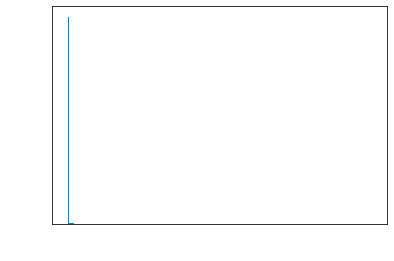

In [7]:
alpha = 1.2
n = 10_000
n_bins = 200
data = np.random.zipf(alpha, n)
plt.hist(data, bins=n_bins)
set_white_ticks()

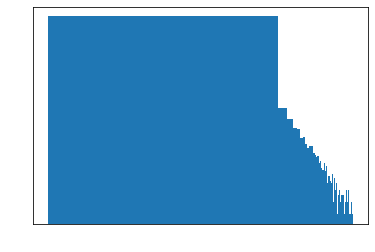

In [8]:
plt.hist(data, bins=n_bins, log=True)
plt.xscale('log')
set_white_ticks()

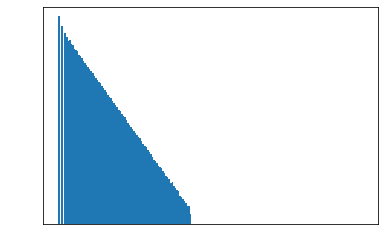

In [9]:
MIN, MAX = 1, max(data)
X_bins = np.logspace(np.log(MIN), np.log(MAX), n_bins)
plt.hist(data, bins=X_bins, log=True, density=True)
plt.xscale('log')
set_white_ticks()

In [10]:
def get_bins_middle(bins):
    return (bins[:-1] + bins[1:]) /2

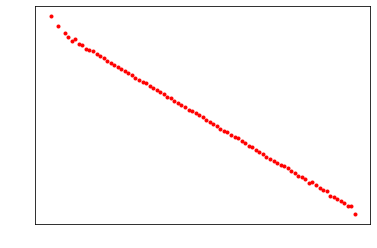

In [11]:
counts, bins, _ = plt.hist(data, bins=X_bins, log=True, density=True)
plt.clf()
X = get_bins_middle(bins)
X, Y = zip(*[(np.log(b), np.log(c)) for b, c in zip(X, counts) if c>0])
plt.plot(X, Y, 'ro', markersize=3)
set_white_ticks()

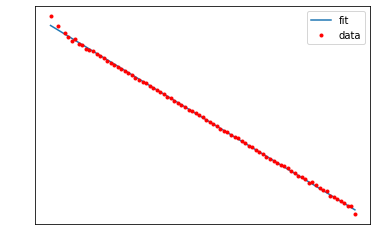

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(np.array(X).reshape(-1, 1), np.array(Y).reshape(-1, 1))
alpha, c = lin_reg.coef_, lin_reg.intercept_
X_f = np.linspace(min(X), max(X), num=200).reshape(-1, 1)
y_f = lin_reg.predict(X_f)
plt.plot(X_f, y_f, label='fit')
plt.plot(X, Y, 'ro', markersize=3, label='data')
plt.legend()
set_white_ticks()

In [13]:
print(alpha, c)

[[-1.20917295]] [-1.578336]
[[0.27109062]]


## P4.1

Graph

In [8]:
G = nx.generators.karate_club_graph()


## P4.3

In [9]:
def plot_average_degree_connectivity(graph):
    adc = nx.algorithms.average_degree_connectivity(graph)
    plt.scatter(adc.keys(), adc.values())
    set_white_ticks()

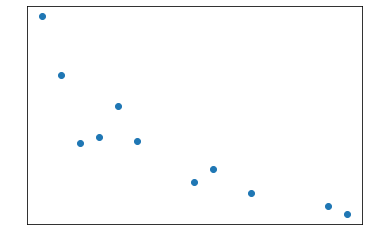

In [10]:
plot_average_degree_connectivity(G)

## P4.4

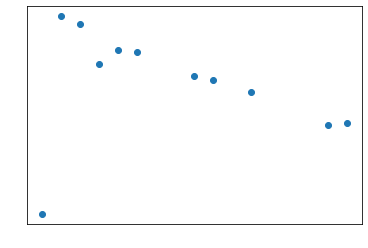

In [11]:
G_2 = nx.algorithms.double_edge_swap(G, nswap=10_000, max_tries=1_000_000)
plot_average_degree_connectivity(G_2)

## P4.6
Degree assortativity

In [12]:
print('Before swap r =',nx.degree_pearson_correlation_coefficient(G))
print('After  swap r =',nx.degree_pearson_correlation_coefficient(G_2))

Before swap r = -0.25119879435539116
After  swap r = -0.25119879435539116


## P4.7


In [13]:
G_bio = read_mtx('../data/bio-diseasome/bio-diseasome.mtx')
G_enron = read_mtx('../data/email-enron-only/email-enron-only.mtx')
G_power_bus = read_mtx('../data/power-494-bus/power-494-bus.mtx', data=(('weight', float), ))
G_usair97 = read_mtx('../data/inf-USAir97/inf-USAir97.mtx', data=(('weight', float), ))
G_econ = read_mtx('../data/econ-beaflw/econ-beaflw.mtx', data=(('weight', float), ))
graphs = [G_bio, G_enron, G_power_bus, G_usair97, G_econ]
table = get_basic_parameters_table(graphs)
display_pandas_table(table)

               name direct    N      E     <k> alpha      l      r
0     bio-diseasome  False  516   1188     4.6  1.59   6.51   0.07
1  email-enron-only  False  143    623    8.71  1.42   2.97  -0.02
2     power-494-bus  False  494   1080    4.37  2.39  10.47    0.2
3       inf-USAir97  False  332   2126   12.81  1.45   2.74  -0.21
4       econ-beaflw  False  502  45303  180.49  1.18   1.64  -0.33